In [ ]:
# Importation des bibliothèques
import pandas as pd

In [ ]:
data=pd.read_excel("data_insectes.xlsx")




## Lien entre la dégradation par les  insectes et le soja. Etudes des profils

In [ ]:
data.head()

,Identifiant,Q_2.2.1_zone,Q_5.1.2_type_culture,Q_6.1.4.2_Insecticides_chimiques,Q_6.2.1.2_pourquoi_n'utiliser_plus_de_produits_chimiques,Q_7.4.1_Principales_difficultes_de_production,Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles,Q_11_Dist_soja
0,1,S1 Cipoal,Ferme productive ou arriere-cour ; Consortium ...,Jamais,Autres,Secheresse ; Temperature ; Autres,0,"1095,51252"
1,2,S3 Fin de Curuá Una,Plantation ; Legumes ; Ferme productive ou arr...,Jamais,,Deplacement de la saison des pluies,0,"332,63559"
2,5,S2 Debut de Curuá Una,Plantation ; ferme productive ou arriere-cour,Jamais,,"Periode de secheresse ; ravageurs, maladies, i...",1,"2088,75635"
3,6,S2 Debut de Curuá Una,Plantation,Jamais,,Exces d'eau/inondation,0,"2118,08259"
4,7,S2 Debut de Curuá Una,Plantation ; Legumes ; Ferme productive ou arr...,Jamais,,Sol faible/degradation,0,"2109,71947"


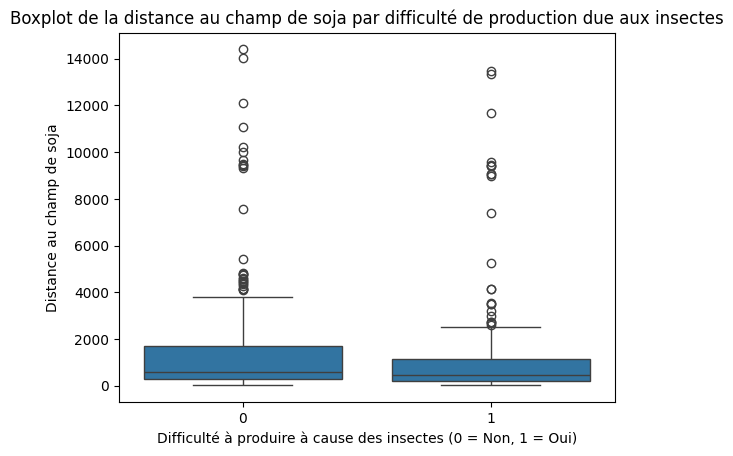

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remplacer les virgules par des points et convertir la colonne 'Q_11_Dist_soja' en numérique
data['Q_11_Dist_soja'] = data['Q_11_Dist_soja'].str.replace(',', '.').astype(float)

# Arrondir les valeurs de 'Q_11_Dist_soja' à l'entier le plus proche
data['Q_11_Dist_soja'] = data['Q_11_Dist_soja'].round(0)

# Convertir la colonne 'Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles' en catégorielle
data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'] = data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'].astype('category')

# Créer un boxplot pour chaque catégorie de 'Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'
sns.boxplot(x='Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles', y='Q_11_Dist_soja', data=data)

# Définir le titre et les labels des axes
plt.title('Boxplot de la distance au champ de soja par difficulté de production due aux insectes')
plt.xlabel('Difficulté à produire à cause des insectes (0 = Non, 1 = Oui)')
plt.ylabel('Distance au champ de soja')

# Afficher le graphique
plt.show()


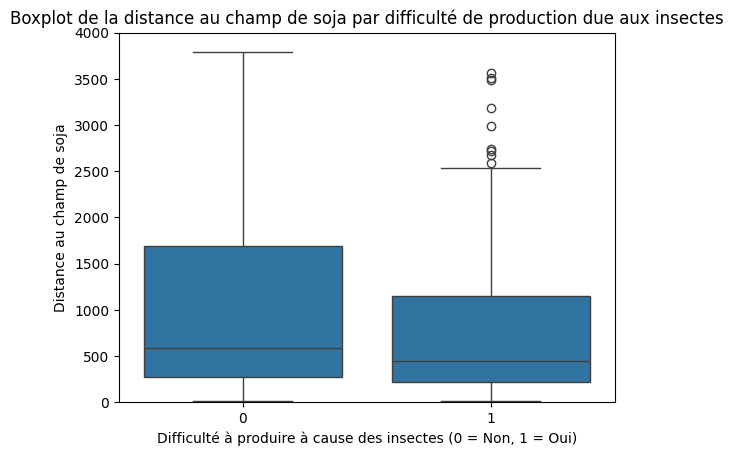

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la colonne 'Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles' en catégorielle
data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'] = data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'].astype('category')

# Créer un boxplot pour chaque catégorie de 'Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'
sns.boxplot(x='Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles', y='Q_11_Dist_soja', data=data)

# Définir le titre et les labels des axes
plt.title('Boxplot de la distance au champ de soja par difficulté de production due aux insectes')
plt.xlabel('Difficulté à produire à cause des insectes (0 = Non, 1 = Oui)')
plt.ylabel('Distance au champ de soja')

# Limiter l'axe des y pour exclure les valeurs aberrantes
plt.ylim(0, 4000)

# Afficher le graphique
plt.show()


In [ ]:
# Obtenir les statistiques de 'Q_11_Dist_soja' pour chaque catégorie de 'Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'
stats = data.groupby('Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles')['Q_11_Dist_soja'].describe()

stats


,count,mean,std,min,25%,50%,75%,max
Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles,,,,,,,,
0,254.0,1527.338583,2385.652290,17.0,271.00,585.0,1691.25,14400.0
1,166.0,1419.114458,2540.151104,9.0,217.25,441.0,1154.50,13468.0


In [ ]:
from scipy import stats

# Séparer les données en deux groupes
groupe_0 = data[data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'] == 0]['Q_11_Dist_soja']
groupe_1 = data[data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'] == 1]['Q_11_Dist_soja']

# Effectuer un test t de Student
t_stat, p_val = stats.ttest_ind(groupe_0, groupe_1)

print(f"Statistique de test : {t_stat}")
print(f"Valeur p : {p_val}")


Statistique de test : 0.4429897978494744
Valeur p : 0.6580022796820444


la valeur p est supérieure à 0,05, ce qui suggère qu’il n’y a pas de différence significative entre les distances au champ de soja pour les deux catégories.

la difficulté à produire à cause des insectes ne semble pas être significativement associée à la distance au champ de soja

C'est encore moins aberrantes quand on enlève les valeurs aberrantes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Convertir la colonne 'Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles' en catégorielle
data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'] = data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'].astype('category')

# Calculer l'IQR de 'Q_11_Dist_soja'
Q1 = data['Q_11_Dist_soja'].quantile(0.25)
Q3 = data['Q_11_Dist_soja'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
filtered_data = data[(data['Q_11_Dist_soja'] >= lower_bound) & (data['Q_11_Dist_soja'] <= upper_bound)]

# Séparer les données en deux groupes
groupe_0 = filtered_data[filtered_data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'] == 0]['Q_11_Dist_soja']
groupe_1 = filtered_data[filtered_data['Q_7.4.1_Difficulte_a_produire_des_insectes_maladies_nuisibles'] == 1]['Q_11_Dist_soja']

# Effectuer un test t de Student
t_stat, p_val = stats.ttest_ind(groupe_0, groupe_1)

print(f"Statistique de test : {t_stat}")
print(f"Valeur p : {p_val}")



Statistique de test : 1.6428764901689736
Valeur p : 0.10125571225772574
